In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sys
import pandas as pd

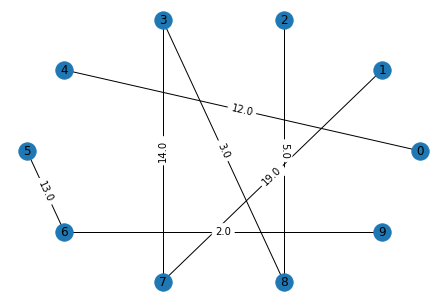

In [2]:
def delete_connect(connect):
    maxim = 0
    i_max, j_max = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if connect[i][j] > maxim:
                maxim = connect[i][j]
                i_max, j_max = i, j
    connect[i_max][j_max] = connect[j_max][i_max] = 0
    
def knp(matrix, n, k):
    connect = [[0 for i in range(n)] for j in range(n)]
    connect_pnt = first_connect(matrix, connect)
    while 0 in connect_pnt:
        neighb(matrix, connect, connect_pnt)
    for i in range(k-1):
        delete_connect(connect)
    clust_pnt = np.zeros(n)
    old_connect = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            old_connect[i][j] = connect[i][j]
    for i in range(1, k):
        cluster(i, connect, clust_pnt)
    plot_graph(old_connect, n)
    return clust_pnt

def first_connect(matrix, connect):
    connect_pnt = np.zeros(n)
    minim = sys.maxsize
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i+1, n):
            if minim > matrix[i][j]:
                minim = matrix[i][j]
                i_min, j_min = i, j
    connect[i_min][j_min] = minim
    connect[j_min][i_min] = minim
    matrix[i_min][j_min] = sys.maxsize
    matrix[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1
    return connect_pnt

def neighb(matrix, connect, connect_pnt):
    minim = sys.maxsize
    i_min, j_min = None, None
    for i in range(n):
        if connect_pnt[i] == 1:
            for j in range(n):
                if connect_pnt[j] == 0:
                    if minim > matrix[i][j]:
                        minim = matrix[i][j]
                        i_min, j_min = i, j
    connect[i_min][j_min] = minim
    connect[j_min][i_min] = minim
    matrix[i_min][j_min] = sys.maxsize
    matrix[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1

def plot_graph(connect, n):
    G = nx.Graph(strict=False)
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(n):
            if connect[i][j] != 0:
                G.add_edge(i,j, matrix=connect[i][j])
                G.add_edges_from([(i, j, {'matrix': connect[i][j]})])
                connect[i][j] = connect[j][i] = 0 
    nx.draw_circular(G, with_labels=True)
    pos = nx.circular_layout(G)
    edge_labels = nx.get_edge_attributes(G,'matrix')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)
    
def cluster(cl, connect, clust_pnt): 
    clust = []
    for i in range(n): 
        for j in range(n): 
            if connect[i][j] == 0: 
                continue
            if len(clust) == 0:
                clust.append(i)
                clust.append(j)
                connect[i][j] = connect[j][i] = 0 
    m = clust[0]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if connect[m][j] == 0: 
                continue
            else:
                clust.append(j)
                connect[m][j] = connect[j][m] = 0
                m = j
    m = clust[1]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if connect[m][j] == 0: 
                continue
            else:
                clust.append(j)
                connect[m][j] = connect[j][m] = 0
                m = j
    for i in clust:
        clust_pnt[i] = cl
        
n=10
matrix=[[0]*n]*n
for i in range(n):
    matrix[i][n-i-1]=0
    for j in range(0,i):
        matrix[j][i]=matrix[i][j]
k = 3
matrix = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(i + 1, n):
        matrix[i][j] = np.random.randint(1, 100)
        matrix[j][i] = matrix[i][j]      
matrix
clust_pnt = knp(matrix, n, k)